In [457]:
import pandas as pd
import numpy as np

# Reading from xlsx file
### Q1:

In [458]:
data_frame = pd.read_excel('DataSet.xlsx')

data_frame.info()
data_frame.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,480.000000,506.000000,506.000000,506.000000,479.000000,506.000000,506.000000,506.000000,486.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.175000,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,336.820947,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.380364,1.646991,27.220206,33.104049,6.527286,203.542157,180.670077,87.585243,121.174519,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.425900,4.000000,254.000000,17.000000,370.415000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.341400,24.000000,403.000000,20.200000,395.630000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


### Q2:

In [459]:
def printMissing(data_frame_):
    missing_rows_count = sum([True for i, row in data_frame_.iterrows() if any(row.isnull())])
    all_null_values = data_frame_.isnull().sum(axis=1)
    all_rows_count = data_frame_.shape[0]
    print("count of all missing values: ", all_null_values)
    print("count of rows with a missing value: ", missing_rows_count)
    print("proportion of rows with missing value to all the rows: ", missing_rows_count/all_rows_count)

printMissing(data_frame)

count of all missing values:  0      0
1      0
2      0
3      1
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Length: 506, dtype: int64
count of rows with a missing value:  115
proportion of rows with missing value to all the rows:  0.22727272727272727


### Q3:

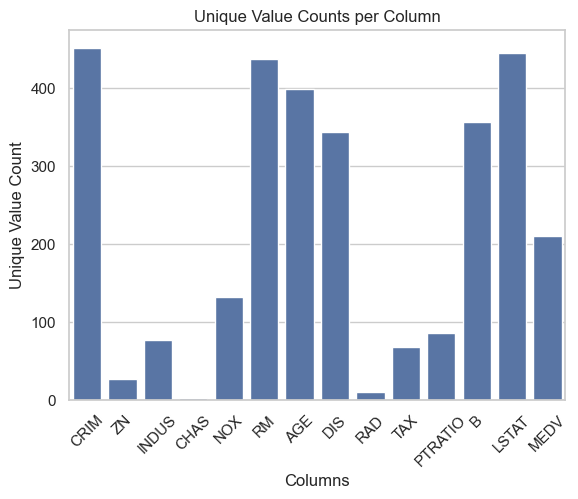

In [460]:
import seaborn as sns
import matplotlib.pyplot as plt

unique_counts = data_frame.nunique()
nu = unique_counts.reset_index()
nu.columns = ['feature', 'nunique']

ax = sns.barplot(x='feature', y='nunique', data=nu)
plt.xlabel('Columns')
plt.ylabel('Unique Value Count')
plt.title('Unique Value Counts per Column')
plt.xticks(rotation=45)
plt.show()


### Q4:

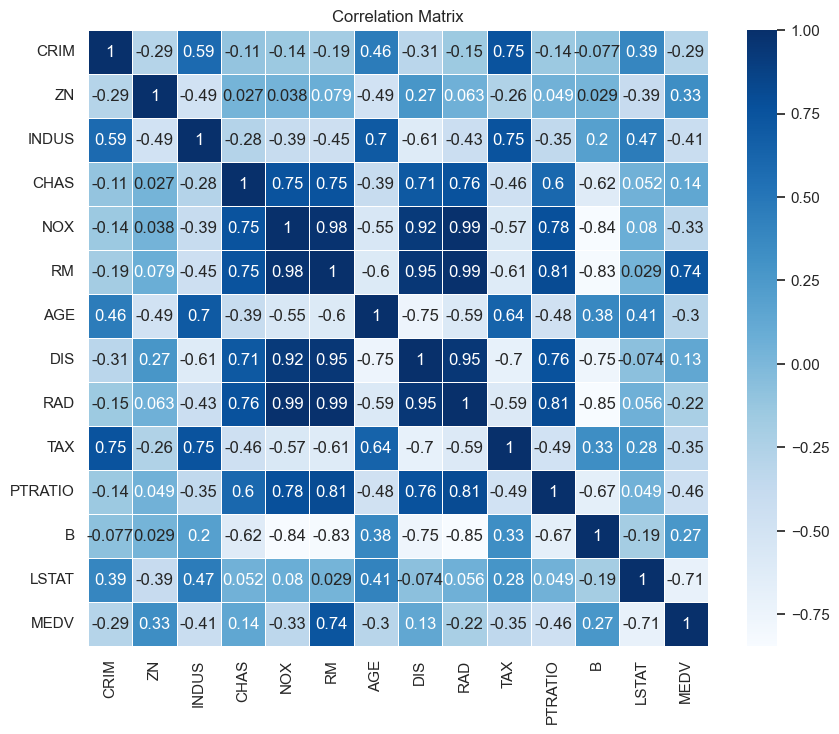

In [461]:
correlation_matrix = data_frame.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

as we can see, RM and RAD, NOX and RAD, RM and DIS, NOX and DIS, NOX and RM, RAD and DIS have high correlation with eachother meaning a meaningful relation between these features is present.

### Q5:
- **scatter plot**:

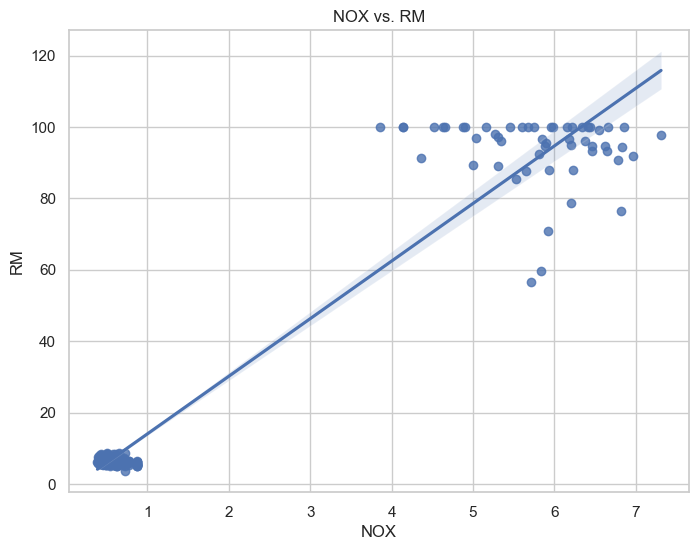

In [462]:
plt.figure(figsize=(8, 6))
sns.regplot(x=data_frame['NOX'], y=data_frame['RM'])
plt.title('NOX vs. RM')
plt.xlabel('NOX')
plt.ylabel('RM')
plt.show()

the above scatter plot is for the NOX and RM that have high correlation with eachother

- the line in the middle is a regression line, and is a approximation of the relationship between two features and it represents the average trend in data points.
- the slope indicates the direction and strength of the relationship, If the slope is positive, it suggests that as one feature increases, the other tends to increase. If the slope is negative, it suggests an inverse relationship (as one feature increases, the other tends to decrease).
- The intercept (where the line crosses the y-axis) represents the predicted value of the dependent variable when the independent variable is zero.
Data points that lie above the line have higher values than predicted by the line. Data points that lie below the line have lower values than predicted by the line.
-  If the data points are clustered closely around the line, it suggests a strong correlation between the features.


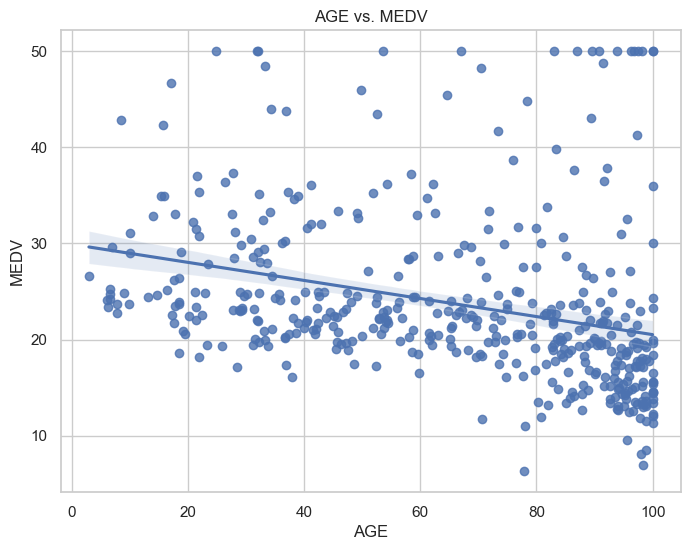

In [463]:
plt.figure(figsize=(8, 6))
sns.regplot(x=data_frame['AGE'], y=data_frame['MEDV'])
plt.title('AGE vs. MEDV')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

this one is for AGE and MEDV that have a correlation of 0.3 with eachother, positive but not so much. 

- **Hexbin plot**:

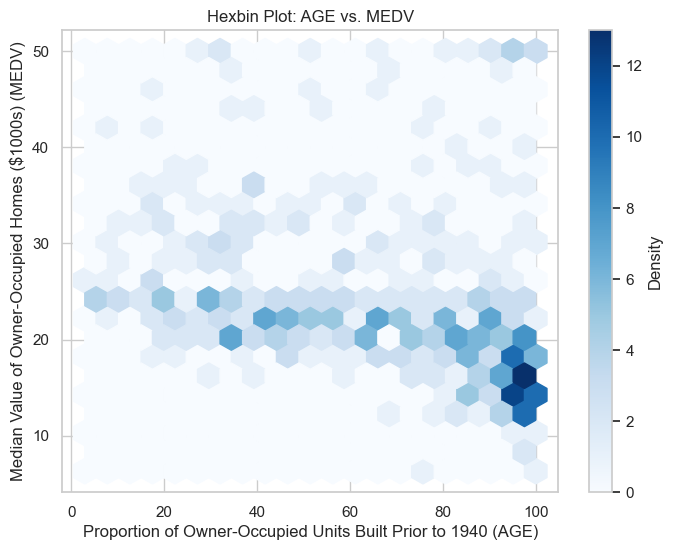

In [464]:
selected_features = data_frame[['AGE', 'MEDV']].dropna()

plt.figure(figsize=(8, 6))
plt.hexbin(selected_features['AGE'], selected_features['MEDV'], gridsize=20, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Proportion of Owner-Occupied Units Built Prior to 1940 (AGE)')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s) (MEDV)')
plt.title('Hexbin Plot: AGE vs. MEDV')
plt.show()

- Darker hexagons indicate regions with more densely packed points. Lighter hexagons represent sparsely populated areas.
- if the hexbin froms some kind of a pattern it means a correlation between the two features.
- Gradual color transitions indicate a smooth density gradient. Abrupt color changes may highlight specific regions of interest.

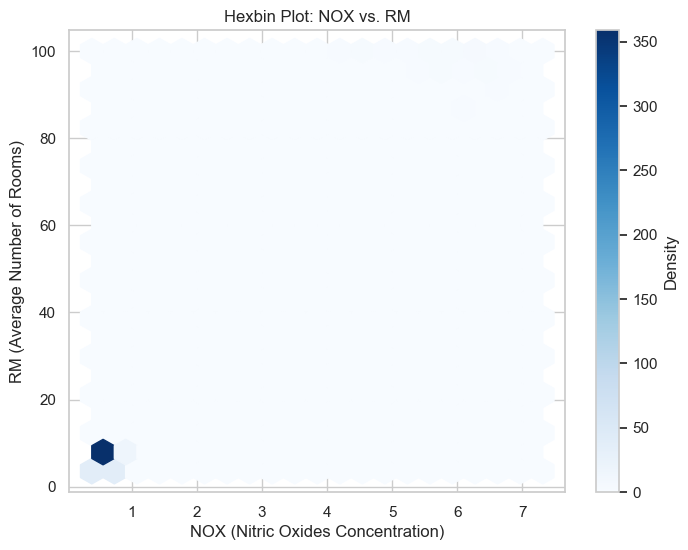

In [465]:
selected_features = data_frame[['NOX', 'RM']].dropna()

plt.figure(figsize=(8, 6))
plt.hexbin(selected_features['NOX'], selected_features['RM'], gridsize=20, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('NOX (Nitric Oxides Concentration)')
plt.ylabel('RM (Average Number of Rooms)')
plt.title('Hexbin Plot: NOX vs. RM')
plt.show()

### Q6:

We draw each features histogram to see if they have normal distribution or not. the purpose is to further check if they need be normalized or standardized.

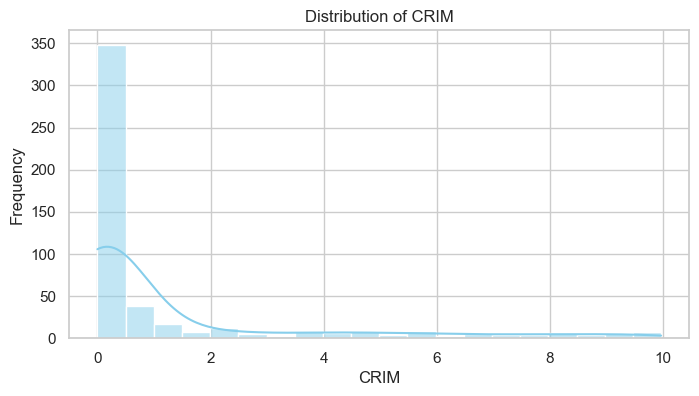

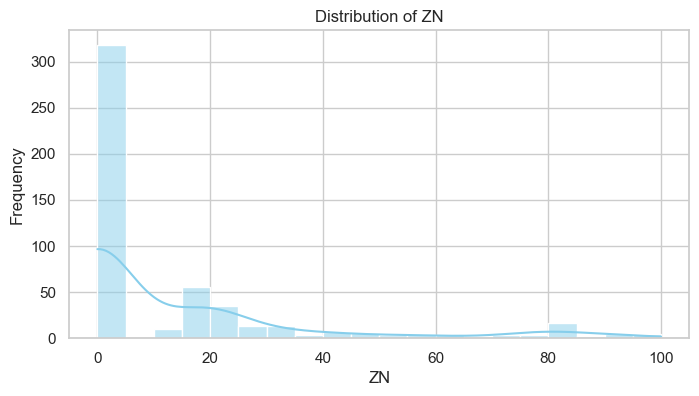

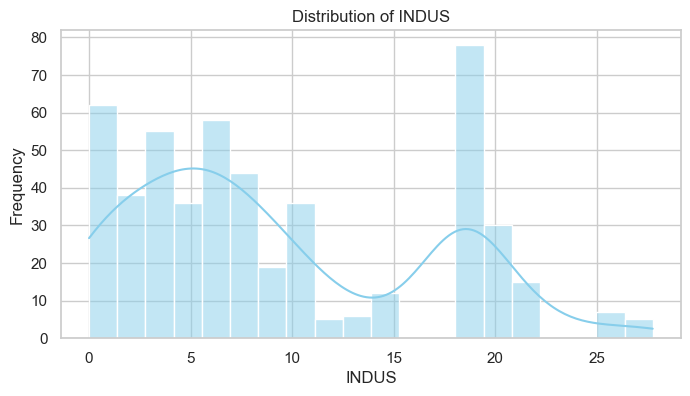

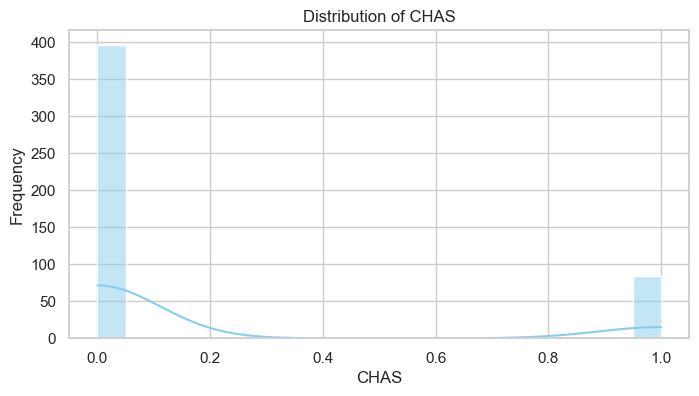

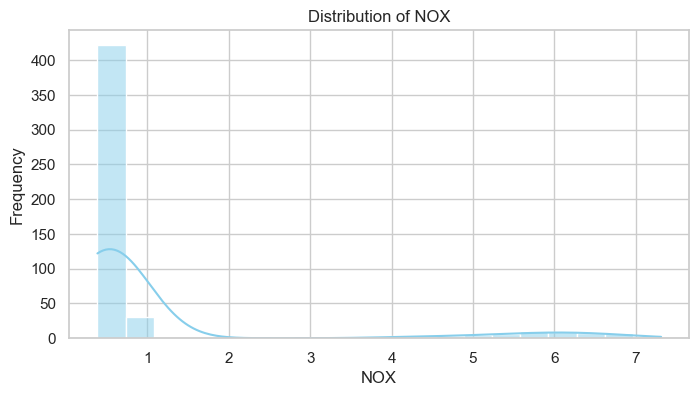

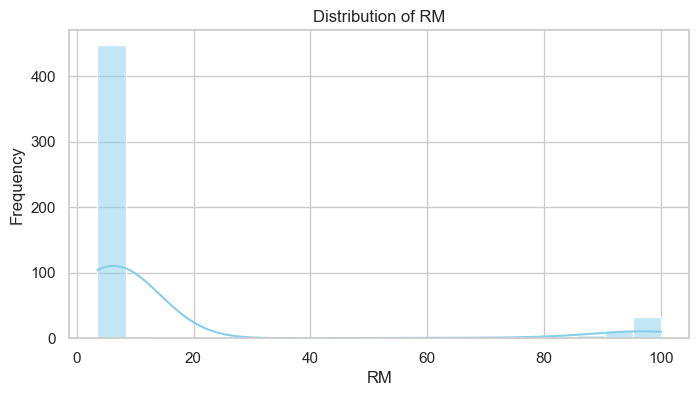

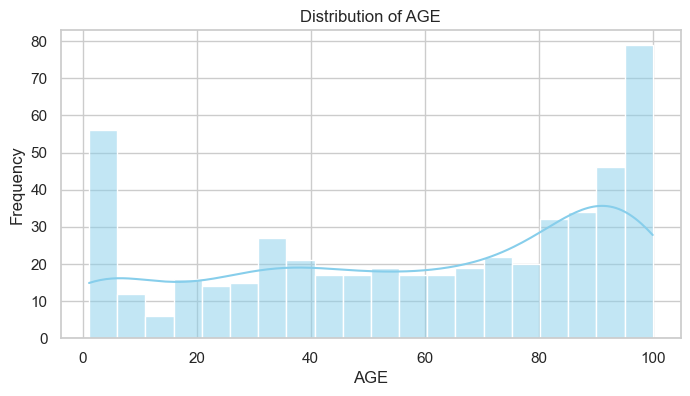

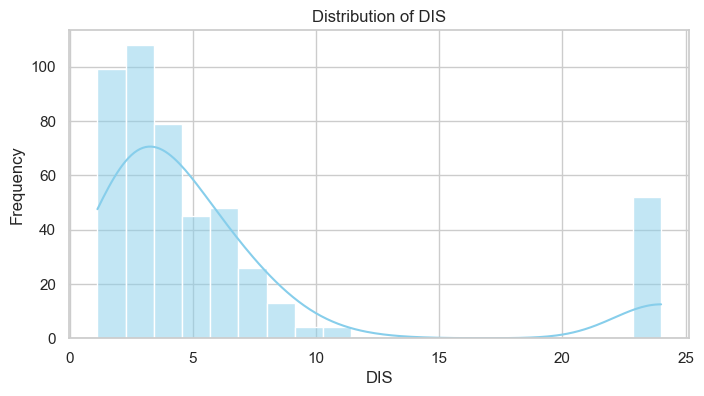

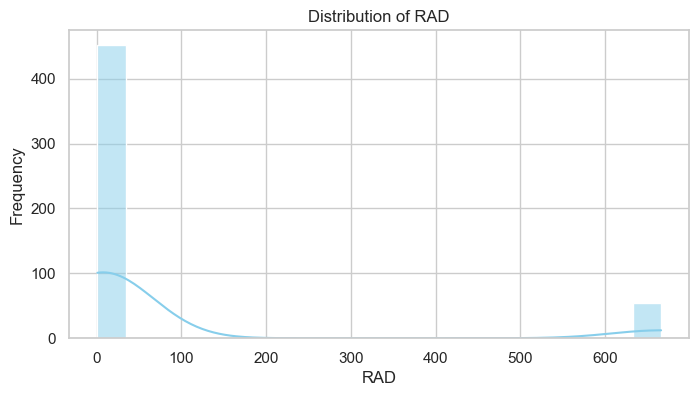

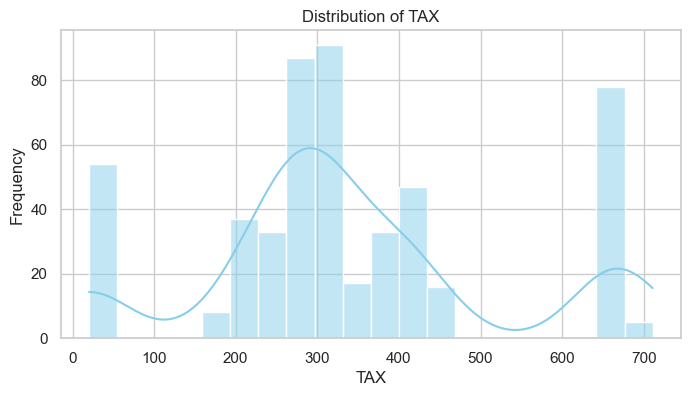

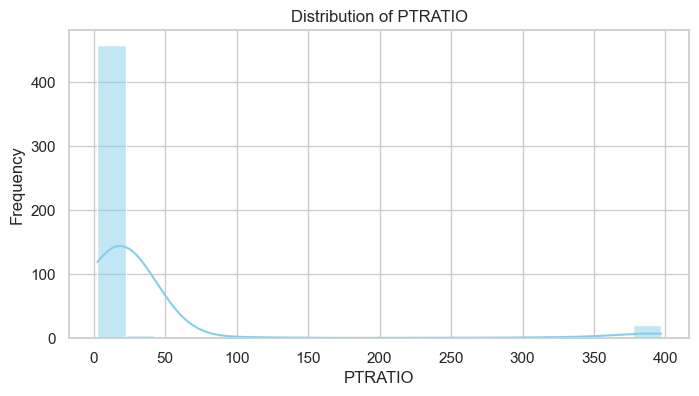

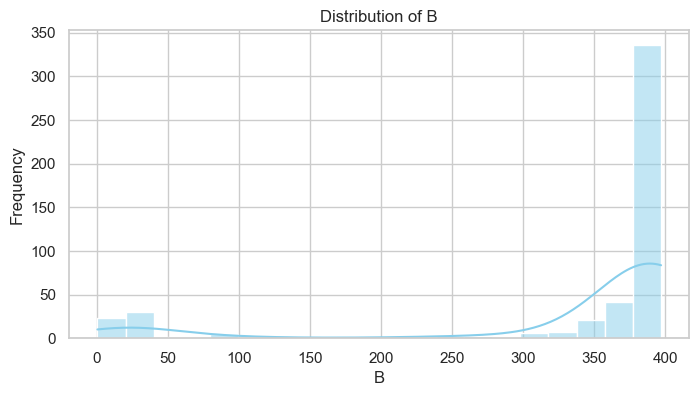

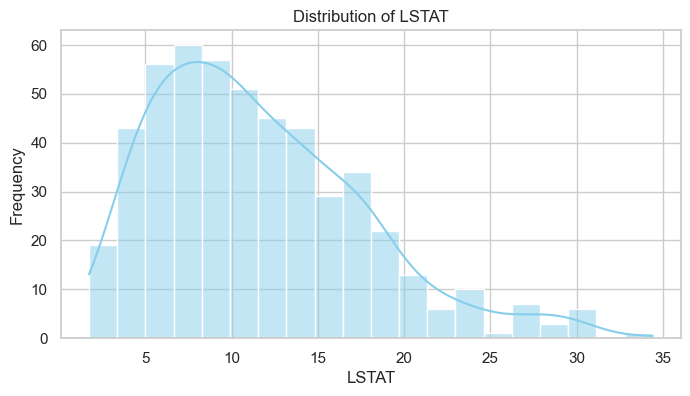

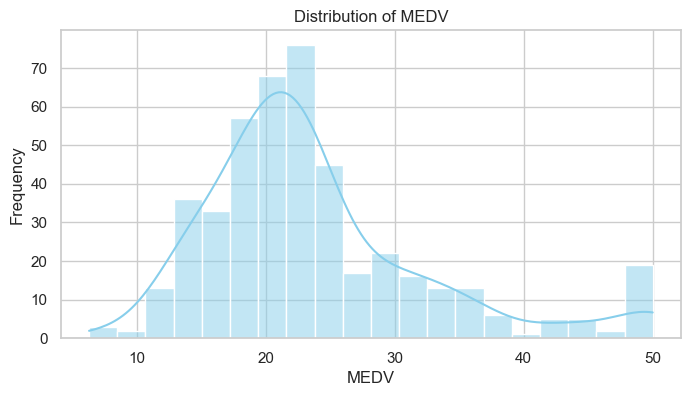

In [466]:
sns.set(style="whitegrid")

for column in data_frame.columns:
    plt.figure(figsize=(8, 4))  
    sns.histplot(data_frame[column], kde=True, color='skyblue', bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

### Q7:

### Handling missing values:
**1.** **Droping the row**: 

In [467]:
dropped_df = data_frame.dropna()
printMissing(dropped_df)

count of all missing values:  0      0
1      0
2      0
4      0
5      0
      ..
501    0
502    0
503    0
504    0
505    0
Length: 391, dtype: int64
count of rows with a missing value:  0
proportion of rows with missing value to all the rows:  0.0


**2. Mean/Median Replacement:** 

In [468]:
df_imputed_mean = data_frame.fillna(data_frame.mean())
df_imputed_median = data_frame.fillna(data_frame.median())

print("Summary statistics for imputed mean:")
print(df_imputed_mean.describe(include='all'))

print("Summary statistics for imputed median:")
print(df_imputed_median.describe(include='all'))


Summary statistics for imputed mean:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     1.269195   13.295257    9.205158    0.175000    1.101175   15.679800   
std      2.399207   23.048697    7.169630    0.370443    1.646991   27.220206   
min      0.000000    0.000000    0.000000    0.000000    0.385000    3.561000   
25%      0.049443    0.000000    3.440000    0.000000    0.449000    5.961500   
50%      0.144655    0.000000    6.960000    0.000000    0.538000    6.322500   
75%      0.819623   18.100000   18.100000    0.000000    0.647000    6.949000   
max      9.966540  100.000000   27.740000    1.000000    7.313000  100.000000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    58.744660    6.211663   78.063241  339.317787   42.614980  336.

**3. Random sample imputation:**

In [469]:
random_impute_df = data_frame.copy()

sampled_df = dropped_df.sample(20)
missing_rows = data_frame[data_frame.isnull().any(axis=1)]
random_impute_df.loc[missing_rows.index] = sampled_df

print("Summary statistics for random imputed:")
print(random_impute_df.describe(include='all'))

Summary statistics for random imputed:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  391.000000  391.000000  391.000000  391.000000  391.000000  391.000000   
mean     1.466072   12.626598   10.150281    0.066496    0.540974    6.327090   
std      2.583902   24.067772    6.569721    0.249467    0.113629    0.623912   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.071580    0.000000    4.930000    0.000000    0.447000    5.936000   
50%      0.188360    0.000000    8.140000    0.000000    0.520000    6.229000   
75%      1.172330   20.000000   18.100000    0.000000    0.605000    6.617000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.704000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  391.000000  391.000000  391.000000  391.000000  391.000000  391.000000   
mean    65.691560    4.077932    7.877238  376.933504   18.309719  37

### Q8:
- If we want to train our model on a certain feature we can drop some columns because they are unnecessary for our training.
- If correlation of two features are 1, that means they can be the same, so we can drop one of them. here we don't have this condition. on some cases we can drop highly correlated ones aswell, like RM and RAD in our data.
- if a column has to many missing value, it might not be useful for analysis.
- If a column has the same value for all rows (e.g., a constant), it won’t provide any variation. like CHAS in our data.

### Q9:
- **Categorical Variables:** Categorical variables represent different categories or types. They are used to group information with similar characteristics.
- **Numerical Variables:** Numerical variables express information using numbers rather than natural language descriptions.

Looking at our data, we have CHSA and B as categorical and others are numrical. since the categorical features are labeled as integers, we don't need further modifications


### Q10:
- **Normalization**: Normalization (also known as Min-Max normalization) is a technique used to rescale numeric features so that they fall within a specific range, typically [0, 1].
- **Standardization**: Standardization (also known as Z-score normalization) rescales features to have a mean of 0 and a standard deviation of 1. It transforms data to follow a standard normal distribution.

Normalization:
Preferred when data doesn’t follow a normal distribution. Suitable for algorithms that don’t assume any specific distribution.

Standardization:
Good to use when data follows a normal distribution. Useful for maintaining the relative importance of features while ensuring they have similar scales.

In [470]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X = random_impute_df.drop(columns=['MEDV'])  
y = random_impute_df['MEDV']  


scaler = StandardScaler()


X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

df_scaled = pd.concat([X_scaled, y], axis=1)

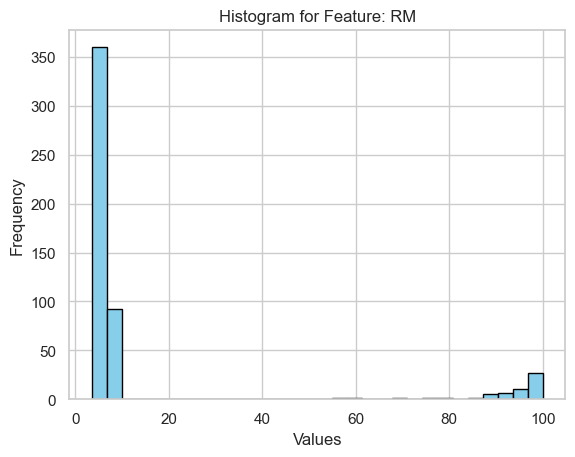

In [471]:
data = data_frame['RM']

plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram for Feature: RM')
plt.show()

### Q11:
1. Encoding Categorical Variables
2. Handling Missing Data
3. Dealing with High Cardinality : High cardinality refers to a large number of unique categories within a feature. Replace categories with their occurrence frequencies.
4.  Visualization and Analysis
5. Feature Engineering

For different features we have to consider the histogram to see if it follows the gaussian distribution. like the plot above, RM feature doesn't follow this distribution so we can normalize it.

### Q12:
- **Training Set:**
The training set is a portion of your data used to train your machine learning model.
- **Validation Set:**
The validation set is a separate portion of your data used to validate the model’s performance during training.
- **Test Set:**
The test set is another independent portion of your data that the model has never seen during training.

### Data Splitting Techniques

1. **Holdout Method**:
   - **Description**: Divide the dataset into three subsets: training, validation, and test.
   - **Ratios**:
     - Training set: Typically 70% of the data.
     - Validation set: Typically 15% of the data.
     - Test set: Typically 15% of the data.
   - **Purpose**:
     - Train the model on the training set.
     - Tune hyperparameters using the validation set.
     - Evaluate the final model on the test set.

2. **K-Fold Cross-Validation**:
   - **Description**: Split the data into K equally sized folds (subsets).
   - **Process**:
     - Train the model K times:
       - Use K-1 folds for training.
       - Use the remaining fold for validation.
     - Average the performance across all K iterations.
   - **Purpose**:
     - Assess model performance and variability.
     - Reduce the impact of randomness in data splitting.

3. **Stratified Sampling**:
   - **Description**: Ensure that each subset (train, validation, test) maintains the same class distribution as the original data.
   - **Use Case**:
     - Useful when dealing with imbalanced classes.
   - **Benefits**:
     - Helps prevent biased evaluation due to class imbalance.


**Holdout method:**

In [472]:
import pandas as pd
from sklearn.model_selection import train_test_split



display(df_scaled)
X = df_scaled.drop(columns=['MEDV']) 
y = df_scaled['MEDV'] 

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.565665,0.223547,-1.194925,-0.266895,-0.026210,0.397857,-0.017350,0.005665,-0.904620,-0.545694,-1.379783,0.381793,-1.077921,24.0
1,-0.557531,-0.525299,-0.469461,-0.266895,-0.634228,0.150712,0.466192,0.417394,-0.773082,-0.909788,-0.233677,0.381793,-0.380181,21.6
2,-0.557539,-0.525299,-0.469461,-0.266895,-0.634228,1.376812,-0.162059,0.417394,-0.773082,-0.909788,-0.233677,0.323936,-1.237261,34.7
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.541357,-0.525299,-1.214739,-0.266895,-0.731159,1.315828,-0.405595,0.931457,-0.641544,-1.044638,0.178922,0.381793,-1.019217,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.543844,-0.525299,0.271244,-0.266895,0.282205,0.426745,0.120301,-0.750760,-0.904620,-0.700771,1.233339,0.311994,-0.291286,22.4
502,-0.550571,-0.525299,0.271244,-0.266895,0.282205,-0.332346,0.388543,-0.840466,-0.904620,-0.700771,1.233339,0.381793,-0.390244,20.6
503,-0.544569,-0.525299,0.271244,-0.266895,0.282205,1.041399,0.893262,-0.896797,-0.904620,-0.700771,1.233339,0.381793,-0.967222,23.9
504,-0.525647,-0.525299,0.271244,-0.266895,0.282205,0.749318,0.833261,-0.792867,-0.904620,-0.700771,1.233339,0.332749,-0.826332,22.0


### Q13:
- **Data Cleaning**
- **Dimensionality Reduction**
- **Feature Engineering**
- **Sampling Data**
- **Data Transformation**
- **Handling Imbalanced Data**

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [473]:
def linear_regression(input, output):
  input_mean = input.mean()
  output_mean = output.mean()
  bias = ((input - input_mean) * (output - output_mean)).sum() / ((input - input_mean)**2).sum()
  slope = output_mean - bias * input_mean
  return (bias, slope)

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [474]:
def get_regression_predictions(input, intercept, slope):
    return input * intercept + slope

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [475]:
import math
def get_root_mean_square_error(predicted_values, actual_values):
  residuals = predicted_values - actual_values
  residuals_sum_sqr = (residuals ** 2).sum()
  mean_residual_sqr = residuals_sum_sqr/len(predicted_values)
  return math.sqrt(mean_residual_sqr)

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [476]:
def get_r2_score(predicted_values, actual_values):
    residuals = predicted_values - actual_values
    SSres = (residuals ** 2).sum()
    SStot = ((actual_values - actual_values.mean())**2).sum()
    return 1 - SSres / SStot

In [477]:
predicted_values = np.array([10, 20, 30, 40])
actual_values = np.array([12, 18, 28, 42])
print(get_r2_score(predicted_values , actual_values))

0.9689922480620154


Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

R2 score for CRIM: -9.4983
R2 score for ZN: -10.2367
R2 score for INDUS: -5.8884
R2 score for CHAS: -35.4007
R2 score for NOX: -9.5850
R2 score for RM: 0.1422
R2 score for AGE: -12.8740
R2 score for DIS: -74.1752
R2 score for RAD: -18.5049
R2 score for TAX: -9.2064
R2 score for PTRATIO: -3.2532
R2 score for B: -14.4527
R2 score for LSTAT: -0.0612
RMSE score for CRIM: 7.3134
RMSE score for ZN: 7.3344
RMSE score for INDUS: 7.1523
RMSE score for CHAS: 7.5508
RMSE score for NOX: 7.3160
RMSE score for RM: 5.2009
RMSE score for AGE: 7.3921
RMSE score for DIS: 7.6034
RMSE score for RAD: 7.4649
RMSE score for TAX: 7.3044
RMSE score for PTRATIO: 6.8869
RMSE score for B: 7.4176
RMSE score for LSTAT: 5.4919


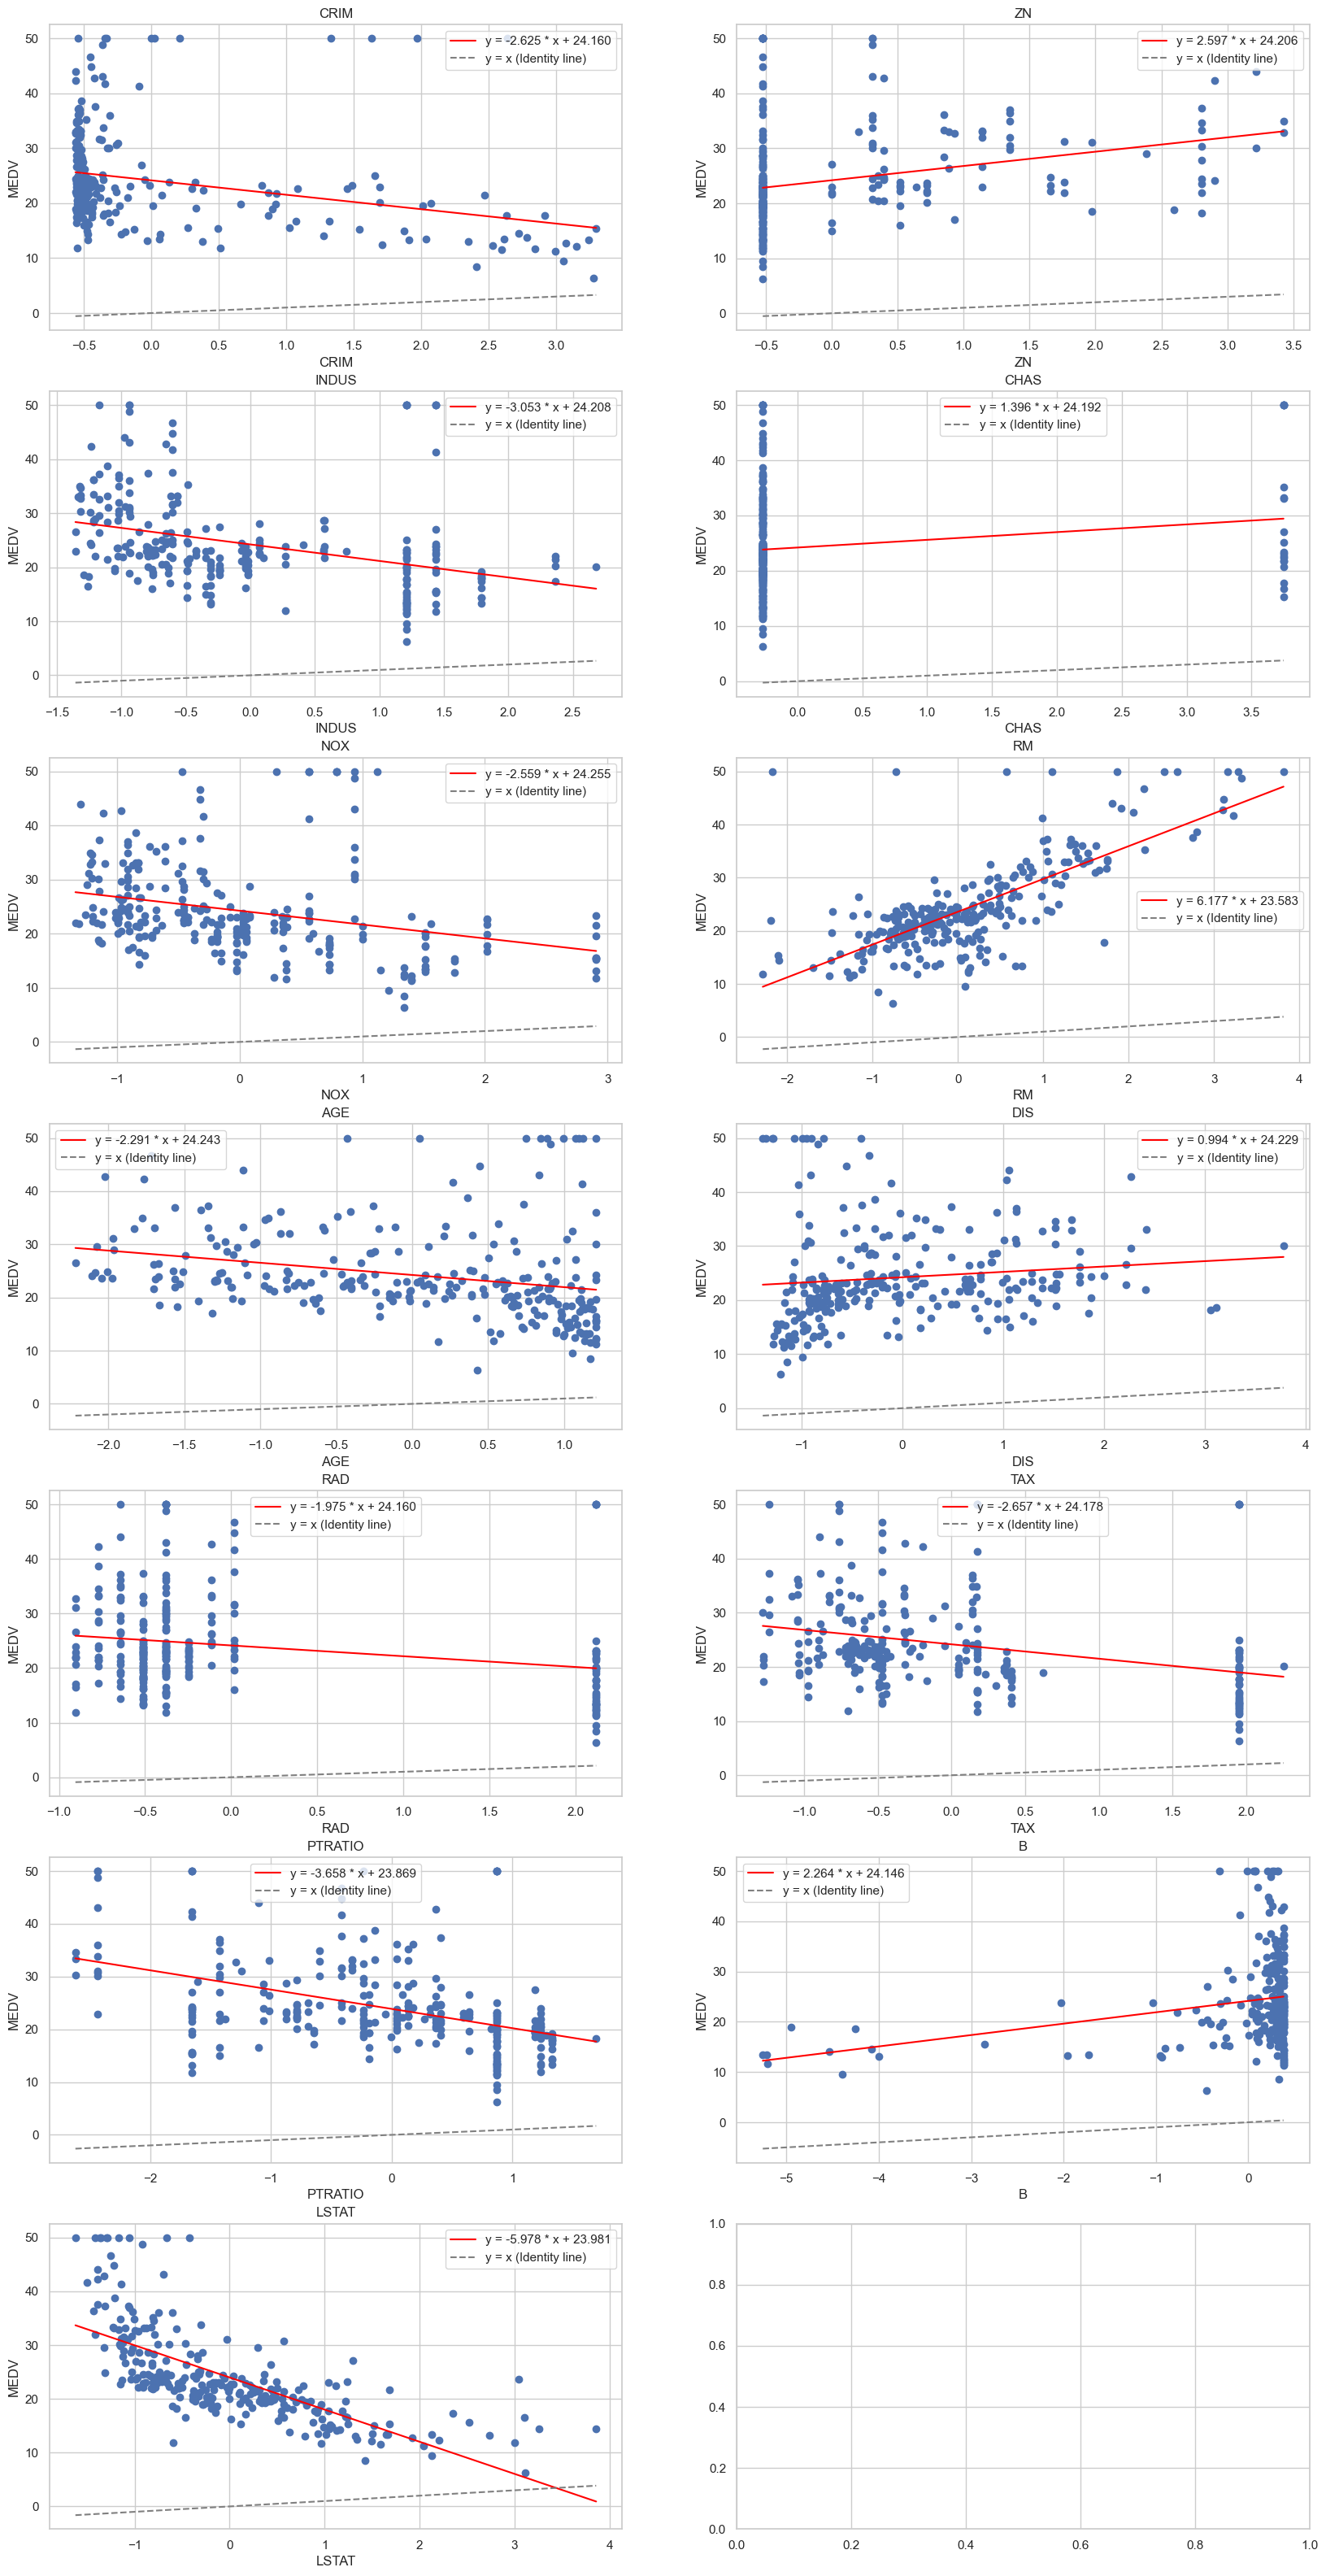

In [480]:
import pandas as pd
from sklearn.metrics import r2_score

r2_scores = {}
rmse_scores = {}
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(20,40))
axs = axs.flatten()


for feature, ax in zip(X_train.columns, axs):
    bias, slope = linear_regression(X_train[feature], y_train)
    predicted_values = get_regression_predictions(X_train[feature], bias, slope)
    
    r2 = get_r2_score(y_train, predicted_values)
    rmse = get_root_mean_square_error(y_train, predicted_values)
    r2_scores[feature] = r2
    rmse_scores[feature] = rmse
    ax.scatter(X_train[feature], y_train)
    x_line = np.linspace(min(X_train[feature]), max(X_train[feature]), 100)
    y_line = bias * x_line + slope
    ax.plot(x_line, y_line, color='red', label = f"y = {bias:0.3f} * x + {slope:0.3f}")
    ax.plot(x_line, x_line, color='gray', linestyle='--', label="y = x (Identity line)")
    ax.set_ylabel("MEDV")
    ax.set_xlabel(feature)
    ax.set_title(feature)
    ax.legend()
    plt.show

for feature, r2 in r2_scores.items():
    print(f"R2 score for {feature}: {r2:.4f}")
for feature, rmse in rmse_scores.items():
    print(f"RMSE score for {feature}: {rmse:.4f}")



As we saw from correlation between RM and MEDV, it was the highest and also it has the best R2 score and the least valid RMSE score.

### Q14:

The main differences between supervised, unsupervised, semi-supervised, and reinforcement learning lie in the type and amount of labeled data used for training and the specific goals of the learning process.

**Supervised Learning**
Definition: Supervised learning involves training a model on a labeled dataset, which means that each training example is paired with an output label. The goal is for the model to learn the mapping from inputs to outputs.

- Example: Predicting house prices based on features such as size, number of bedrooms, and location.

- Common Algorithms: Linear regression, logistic regression, decision trees, support vector machines, neural networks.

**Unsupervised Learning**
Definition: Unsupervised learning involves training a model on data that does not have labeled responses. The goal is to find hidden patterns or intrinsic structures in the input data.

- Example: Customer segmentation based on purchasing behavior.

- Common Algorithms: K-means clustering, hierarchical clustering, principal component analysis (PCA), t-distributed stochastic neighbor embedding (t-SNE).

**Semi-Supervised Learning**
Definition: Semi-supervised learning is a middle ground between supervised and unsupervised learning. It uses a small amount of labeled data and a large amount of unlabeled data. The goal is to improve learning accuracy by leveraging the unlabeled data.

- Example: Classifying emails as spam or not spam with a few labeled emails and many unlabeled emails.

- Common Algorithms: Self-training, co-training, semi-supervised support vector machines (S3VM), label propagation.

**Reinforcement Learning**
Definition: Reinforcement learning involves training an agent to make a sequence of decisions by rewarding it for good actions and punishing it for bad actions. The goal is to learn a strategy (policy) that maximizes the cumulative reward.

- Example: Training a robot to navigate through a maze.

- Common Algorithms: Q-learning, deep Q-networks (DQN), policy gradients, actor-critic methods.

### Q15:
# Regression and Classification

## Regression

**Definition**: Regression is a type of supervised learning task where the goal is to predict a continuous target variable based on one or more input features. The model learns the relationship between the input features and the continuous output variable, and it tries to predict numeric values.

**Example**: Predicting house prices based on features such as size, number of bedrooms, and location.

**Common Algorithms**: Linear regression, polynomial regression, ridge regression, lasso regression, support vector regression (SVR).

## Classification

**Definition**: Classification is a type of supervised learning task where the goal is to predict a categorical target variable based on one or more input features. The model learns the relationship between the input features and the categorical output variable, and it tries to assign the input data to one of several predefined categories or classes.

**Example**: Classifying emails as spam or not spam based on features such as email content, sender, and subject line.

**Common Algorithms**: Logistic regression, decision trees, random forests, support vector machines (SVM), k-nearest neighbors (KNN), neural networks.

## Difference Between Classification and Regression
### Classification:

- Goal: Predict categorical labels.
- Output: Discrete classes or categories.
- Examples: Email spam detection, image recognition, disease diagnosis.

### Regression:

- Goal: Predict continuous values.
- Output: Numeric values.
- Examples: Predicting house prices, stock price forecasting, temperature prediction.

### Q16:
# Linear Regression Formula

**Formula**: \( y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon \)

- \( y \): The dependent variable (target variable).
- \( \beta_0 \): The intercept term (the value of \( y \) when all \( x_i \) are 0).
- \( \beta_1, \beta_2, \ldots, \beta_n \): The coefficients (weights) for each independent variable \( x_1, x_2, \ldots, x_n \).
- \( x_1, x_2, \ldots, x_n \): The independent variables (features).
- \( \epsilon \): The error term (the difference between the observed and predicted values).

**Purpose**: To find the best-fitting line (or hyperplane in higher dimensions) that minimizes the sum of the squared differences between the observed and predicted values.



### Q18:
**R2 Score (Coefficient of Determination)**:
- Measures how well the regression model explains the variance in the dependent variable. 
- Ranges from 0 to 1 (higher is better). 
- An R2 score of 1 indicates that the model perfectly predicts the target variable, while 0 means it performs no better than a constant baseline.

**RMSE (Root Mean Squared Error)**:
- Represents the average deviation of predicted values from actual values.
- Calculated as the square root of the mean of squared errors.
Lower RMSE indicates better model performance.

**MSE (Mean Squared Error)**:
- Measures the average squared difference between predicted and actual values.
- Larger errors are penalized more due to squaring.
- Like RMSE, lower MSE is desirable.

**RSS (Residual Sum of Squares)**:
- The sum of squared residuals (differences between actual and predicted values).
- Used in regression models to assess the goodness of fit.
- Minimizing RSS leads to better-fitting models.

# Ploynomial Regression

To extend the simple linear regression to polynomial regression, we can model the relationship between the independent variable $x$ and the dependent variable $y$ as a polynomial function of degree $n$:

$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

The steps to find the parameters $\beta_i$ are similar to those in simple linear regression. We again minimize the RSS function by taking the derivatives with respect to each parameter and setting them to 0.

- Step 1: Compute the RSS function for polynomial regression:

$$ RSS = \Sigma (y_i - (\hat{\beta_0} + \hat{\beta_1}x_i + \hat{\beta_2}x_i^2 + \ldots + \hat{\beta_n}x_i^n))^2 $$

- Step 2: Compute the derivatives of the RSS function with respect to each parameter $\beta_i$ and set them to 0 to find the desired parameters.

$$ \frac{\partial RSS}{\partial \beta_i} = 0, \text{ for } i = 0, 1, 2, \ldots, n$$

Solving these equations will give us the optimal values of $\beta_i$ for the polynomial regression model. The specific form of the equations will depend on the degree of the polynomial and the number of parameters.

The general form for finding the coefficients for polynomial regression can be represented as:

$$ \beta = (X^T X)^{-1} X^T y $$

where:
- $X$ is the design matrix with columns $x^0, x^1, x^2, ..., x^n$
- $x^i$ represents the feature vector of $x$ raised to the power of $i$
- $y$ is the target variable vector
- $\beta$ is the coefficient vector for the polynomial regression

By solving for $\beta$ using the above formula, we can obtain the coefficients for the polynomial regression model.

In [185]:
def polynomial_regression(x, y, degree):
  pass
  #TO DO

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [186]:
def feature_derivative(errors, feature):
  #TO DO
  pass

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [187]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame

def predict_output(feature_matrix, weights, bias):
    #TO DO FOR POLYNOMIAL REGRESSION PREDICTION
    return predictions



## Polynomial Regression Using Gradient Descent

Polynomial regression using gradient descent involves finding the optimal parameters for a polynomial model by iteratively updating them based on the gradient of a loss function, typically the Mean Squared Error (MSE). The steps involved are as follows:

- **Step 1: Define the polynomial model**
The polynomial model has the form:
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

- **Step 2: Define the loss function**
The loss function, such as Mean Squared Error (MSE), measures the error between the actual target values and the predicted values by the model.

- **Step 3: Initialize the coefficients**
Start with initial guesses for the coefficients $\beta_0, \beta_1, \ldots, \beta_n$

- **Step 4: Update the coefficients using Gradient Descent**
Iteratively update the coefficients to minimize the loss function. This is done by computing the gradient of the loss function with respect to each coefficient and making small adjustments in the opposite direction of the gradient.

- **Step 5: Repeat until convergence**
Continue updating the coefficients iteratively until the algorithm converges to the optimal values.

- **Step 6: Use the learned coefficients for prediction**
Once the coefficients converge, they can be used in the polynomial function to make predictions on new data points.

Overall, polynomial regression using gradient descent is an iterative optimization process that aims to find the best-fitting polynomial curve to the data points by minimizing the prediction errors. The learning rate and the number of iterations are key hyperparameters to tune for efficient convergence and accurate modeling.



In [188]:
def polynomial_regression_gradient_descent(feature_matrix, outputs, initial_weights,bias, step_size, tolerance):
    weights = np.array(initial_weights)

    while True:
        # Compute predictions using polynomial function and errors
        #TO DO

        # Compute derivatives for all weights
        #TO DO

        # Update weights and bias
        #TO DO

        # Check convergence
        #TO DO

    return weights, bias

IndentationError: expected an indented block after 'while' statement on line 4 (3694999079.py, line 17)

In [ ]:

def run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    weights = np.array(initial_weights)
    weights, bias = polynomial_regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, bias, step_size, tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):

    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    # TO DO

    return chosen_feature_matrix, train_weights, bias

## Classification


### KNN:

In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

display(random_impute_df)
low_threshold = random_impute_df['MEDV'].quantile(0.2)
high_threshold = random_impute_df['MEDV'].quantile(0.8)
random_impute_df = random_impute_df.dropna()

random_impute_df['MEDV_class'] = 1
random_impute_df.loc[random_impute_df['MEDV'] >= high_threshold, 'MEDV_class'] = 0
random_impute_df.loc[random_impute_df['MEDV'] <= low_threshold, 'MEDV_class'] = 2

display(random_impute_df)

X = random_impute_df.drop(columns=['MEDV_class'])
X = X.drop(columns=['MEDV'])
y = random_impute_df['MEDV_class']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

display(X_train)

knn_classifier = KNeighborsClassifier(n_neighbors=8, p=1, weights='distance')

knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred_knn)
print(f"Validation Accuracy (KNN): {accuracy:.4f}")

param_grid_knn = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

best_knn_params = grid_search_knn.best_params_
print("Best KNN hyperparameters:", best_knn_params)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,1
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,1
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
27,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4.0,307.0,21.0,306.38,17.28
199,0.03150,95.0,1.47,0.0,0.403,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22
164,2.24236,0.0,19.58,0.0,0.605,5.854,91.8,2.4220,5.0,403.0,14.7,395.11,11.64
345,0.03113,0.0,4.39,0.0,0.442,6.014,48.5,8.0136,3.0,352.0,18.8,385.64,10.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.08387,0.0,12.83,0.0,0.437,5.874,36.6,4.5026,5.0,398.0,18.7,396.06,9.10
118,0.13058,0.0,10.01,0.0,0.547,5.872,73.1,2.4775,6.0,432.0,17.8,338.63,15.37
315,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50
447,9.92485,0.0,18.10,0.0,0.740,6.251,96.6,2.1980,24.0,666.0,20.2,388.52,16.44


Validation Accuracy (KNN): 0.6949
Best KNN hyperparameters: {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}


### Decision Tree:

Validation Accuracy (Decision Tree): 0.7627
Best Decision Tree hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


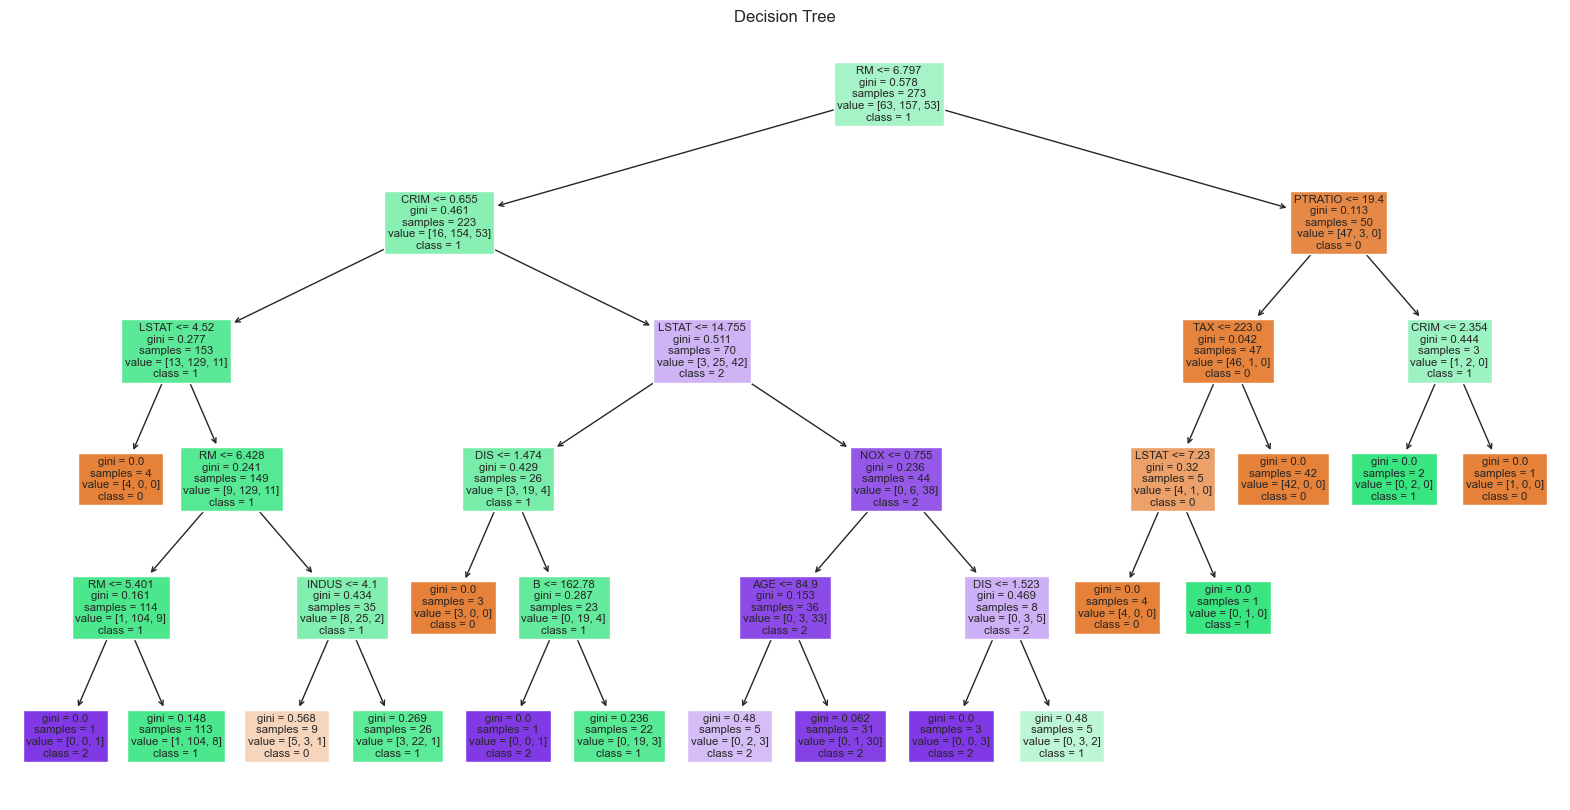

In [208]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2)

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_valid)

accuracy_dt = accuracy_score(y_valid, y_pred_dt)
print(f"Validation Accuracy (Decision Tree): {accuracy_dt:.4f}")

param_grid_dt = {
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

best_dt_params = grid_search_dt.best_params_
print("Best Decision Tree hyperparameters:", best_dt_params)

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=[str(i) for i in set(y_train)])
plt.title("Decision Tree")
plt.show()

### Q21: 
Pruning aims to simplify decision trees by removing parts that do not provide significant predictive power.
It prevents overfitting by reducing the complexity of the final classifier.

**Types of Decision Tree Pruning**:
1. Pre-Pruning (Early Stopping):
Stops tree growth before it becomes too complex.
Techniques include limiting depth, minimum samples per leaf, and maximum features.
2. Post-Pruning (Reducing Nodes):
Removes branches or nodes after the tree is fully grown.
Methods include cost-complexity pruning, reduced error pruning, and minimum impurity decrease.

**Pros of Pruning**:
- Improved Generalization: Pruning reduces overfitting, allowing better generalization to new data.
- Simpler Models: Smaller trees are easier to interpret and maintain.
- Faster Prediction: Pruned trees lead to faster predictions.
- 
**Cons of Pruning**:
- Risk of Underfitting: Over-pruning can lead to underfitting if too many nodes are removed.
- Loss of Information: Pruning discards some data-specific details.
- Hyperparameter Tuning: Choosing optimal pruning parameters

## Ensembling Methods:

### Q22:
In summary, decision trees excel in interpretability, handling missing data, and modeling non-linear relationships. However, they may overfit and require careful tuning.

### Q30:


### Random Forest Method

In [209]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'bootstrap': [True, False]        
}


rf_classifier = RandomForestClassifier()


grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

best_rf_params = grid_search_rf.best_params_
print("Best Random Forest hyperparameters:", best_rf_params)


best_rf_classifier = RandomForestClassifier(**best_rf_params)
best_rf_classifier.fit(X_train, y_train)

y_pred_rf = best_rf_classifier.predict(X_valid)

accuracy_rf = accuracy_score(y_valid, y_pred_rf)
print(f"Validation Accuracy (Random Forest): {accuracy_rf:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Random Forest hyperparameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Validation Accuracy (Random Forest): 0.8305


### Xgboost:

In [210]:
import xgboost as xgb

param_grid_xgb = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7, 10],          
    'learning_rate': [0.01, 0.1, 0.2],    
    'subsample': [0.6, 0.8, 1.0],         
    'colsample_bytree': [0.6, 0.8, 1.0]   
}


xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

best_xgb_params = grid_search_xgb.best_params_
print("Best XGBoost hyperparameters:", best_xgb_params)

best_xgb_classifier = xgb.XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='mlogloss')
best_xgb_classifier.fit(X_train, y_train)

y_pred_xgb = best_xgb_classifier.predict(X_valid)

accuracy_xgb = accuracy_score(y_valid, y_pred_xgb)
print(f"Validation Accuracy (XGBoost): {accuracy_xgb:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best XGBoost hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}
Validation Accuracy (XGBoost): 0.8136


## Support Vector Machine:

Model: SVM with Linear Kernel
Accuracy: 0.7627
F1 Score: 0.7611
Recall: 0.7627
Confusion Matrix:
[[ 6  2  0]
 [ 4 30  2]
 [ 0  6  9]]


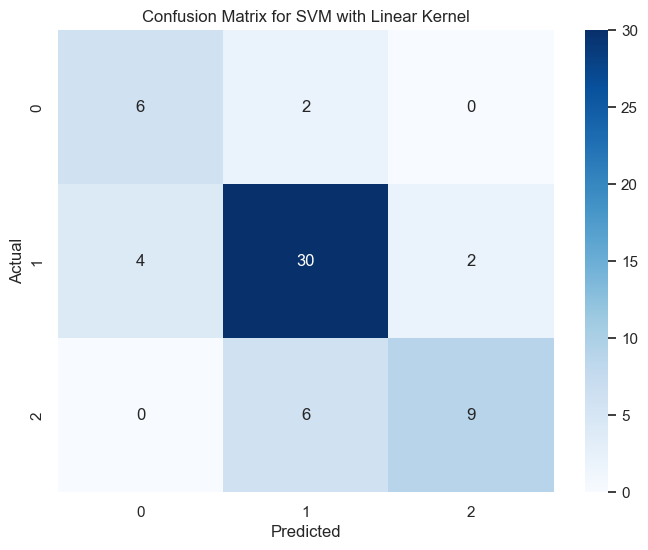

Model: SVM with RBF Kernel
Accuracy: 0.6441
F1 Score: 0.5822
Recall: 0.6441
Confusion Matrix:
[[ 0  7  1]
 [ 0 32  4]
 [ 0  9  6]]


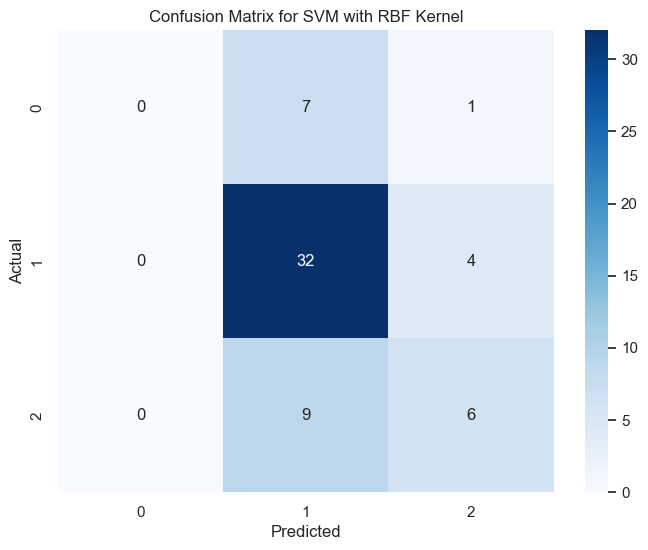

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\Mahdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: Best Grid Search SVM with Linear Kernel
Accuracy: 0.7627
F1 Score: 0.7611
Recall: 0.7627
Confusion Matrix:
[[ 6  2  0]
 [ 4 30  2]
 [ 0  6  9]]


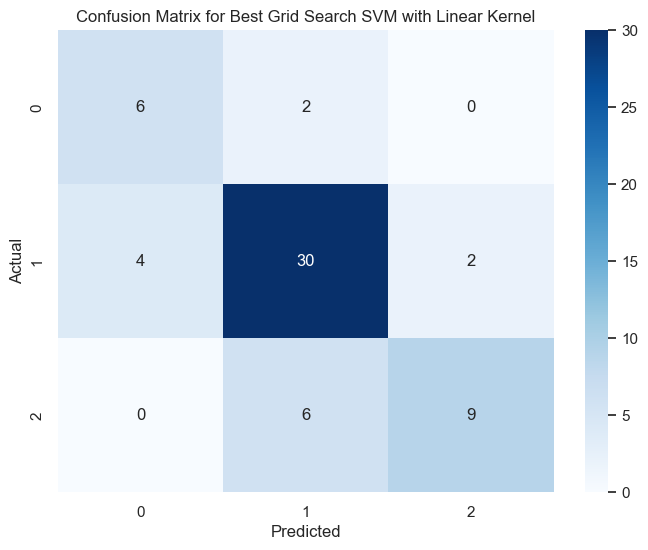

Model: Best Grid Search SVM with RBF Kernel
Accuracy: 0.7627
F1 Score: 0.7628
Recall: 0.7627
Confusion Matrix:
[[ 8  0  0]
 [ 6 28  2]
 [ 0  6  9]]


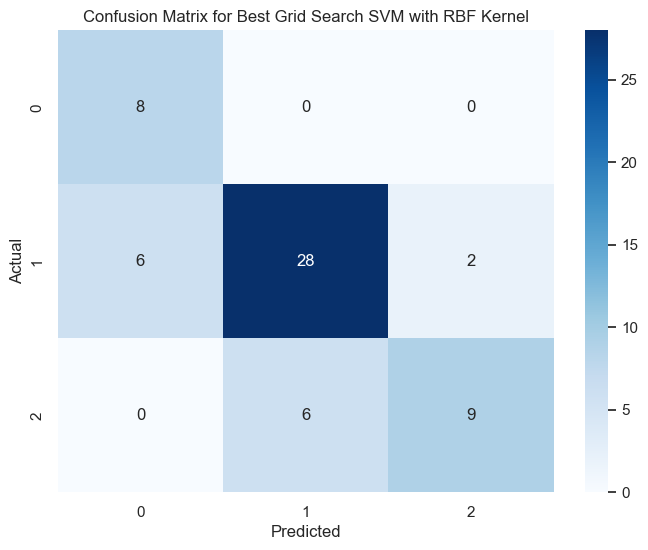

Model: Best Random Search SVM with Linear Kernel
Accuracy: 0.7627
F1 Score: 0.7611
Recall: 0.7627
Confusion Matrix:
[[ 6  2  0]
 [ 4 30  2]
 [ 0  6  9]]


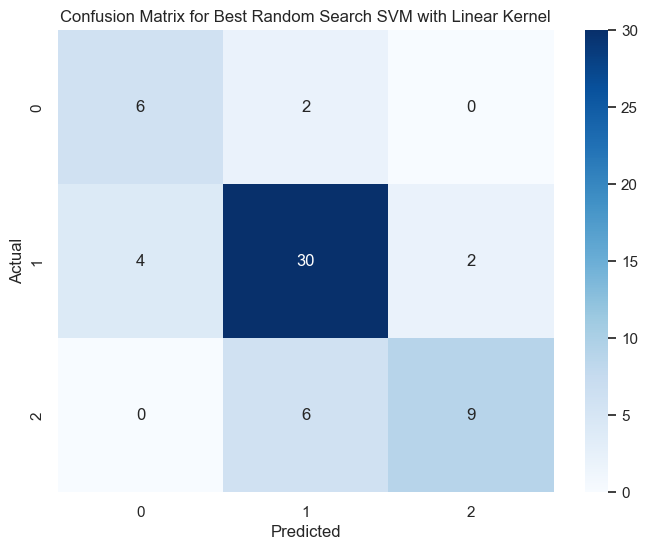

Model: Best Random Search SVM with RBF Kernel
Accuracy: 0.7119
F1 Score: 0.7131
Recall: 0.7119
Confusion Matrix:
[[ 6  2  0]
 [ 5 27  4]
 [ 0  6  9]]


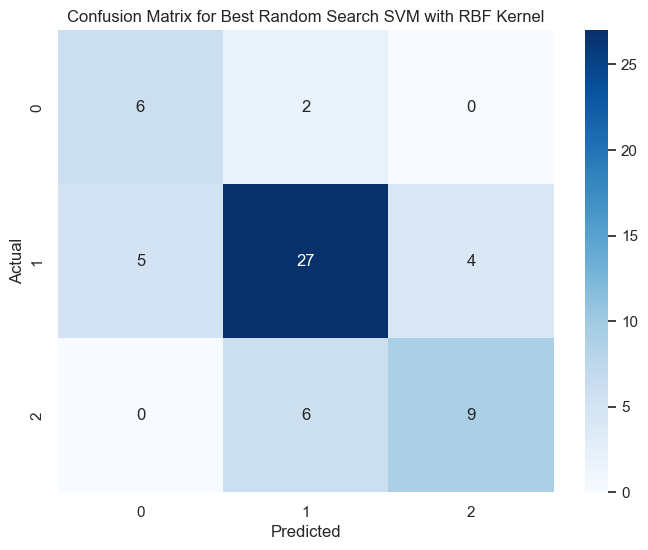

In [211]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_valid)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_valid)

def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

evaluate_model(y_valid, y_pred_linear, "SVM with Linear Kernel")

evaluate_model(y_valid, y_pred_rbf, "SVM with RBF Kernel")


param_grid_linear = {
    'C': [0.1, 1, 10, 100, 1000]
}

param_grid_rbf = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

grid_search_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=5, verbose=2, n_jobs=-1)
grid_search_linear.fit(X_train, y_train)

grid_search_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, verbose=2, n_jobs=-1)
grid_search_rbf.fit(X_train, y_train)

from scipy.stats import uniform

random_search_linear = RandomizedSearchCV(SVC(kernel='linear'), param_distributions=param_grid_linear, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search_linear.fit(X_train, y_train)

random_search_rbf = RandomizedSearchCV(SVC(kernel='rbf'), param_distributions=param_grid_rbf, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search_rbf.fit(X_train, y_train)

best_grid_linear = grid_search_linear.best_estimator_
best_grid_rbf = grid_search_rbf.best_estimator_
best_random_linear = random_search_linear.best_estimator_
best_random_rbf = random_search_rbf.best_estimator_

y_pred_best_grid_linear = best_grid_linear.predict(X_valid)
y_pred_best_grid_rbf = best_grid_rbf.predict(X_valid)
y_pred_best_random_linear = best_random_linear.predict(X_valid)
y_pred_best_random_rbf = best_random_rbf.predict(X_valid)

evaluate_model(y_valid, y_pred_best_grid_linear, "Best Grid Search SVM with Linear Kernel")
evaluate_model(y_valid, y_pred_best_grid_rbf, "Best Grid Search SVM with RBF Kernel")
evaluate_model(y_valid, y_pred_best_random_linear, "Best Random Search SVM with Linear Kernel")
evaluate_model(y_valid, y_pred_best_random_rbf, "Best Random Search SVM with RBF Kernel")


From these results we can conclude that Linear kernel works better with our data. for our search methods, we can see that best grid gives us better parameters.

## Evaluation of Classifiers:

In [214]:
from sklearn.metrics import classification_report

report_dt = classification_report(y_valid, y_pred_dt)
report_knn = classification_report(y_valid, y_pred_knn)
report_xgb = classification_report(y_valid, y_pred_xgb)

print("Decision Tree Classification Report:")
print(report_dt)
print("\nK-Nearest Neighbors Classification Report:")
print(report_knn)
print("\nXGBoost Classification Report:")
print(report_xgb)

accuracy_dt = accuracy_score(y_valid, y_pred_dt)
accuracy_knn = accuracy_score(y_valid, y_pred_knn)
accuracy_xgb = accuracy_score(y_valid, y_pred_xgb)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.81      0.81      0.81        36
           2       0.91      0.67      0.77        15

    accuracy                           0.76        59
   macro avg       0.74      0.74      0.72        59
weighted avg       0.79      0.76      0.77        59


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         8
           1       0.74      0.78      0.76        36
           2       0.82      0.60      0.69        15

    accuracy                           0.69        59
   macro avg       0.65      0.63      0.63        59
weighted avg       0.71      0.69      0.70        59


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1    